In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


# First glance at the datasets and data cleaning

In [2]:
train_data = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_data = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
print('Dimensions of the training set are:', train_data.shape)
print('Dimensions of the test set are:', test_data.shape)

Dimensions of the training set are: (1460, 81)
Dimensions of the test set are: (1459, 80)


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Let's have a closer look at missing values.

In [6]:
def missing_data(data):
    missing_total = data.isnull().sum()
    missing_percent = round((missing_total/len(data))*100, 2)
    table = pd.concat([missing_total, missing_percent], axis=1, keys=['Missing Total', 'Missing Percent'])
    types = []
    for column in data.columns:
        data_type = str(data[column].dtype)
        types.append(data_type)
    table['Data Type'] = types
    return table

In [7]:
pd.set_option('display.max_rows', None)
train_missing = missing_data(train_data)
train_missing

,Missing Total,Missing Percent,Data Type
Id,0,0.00,int64
MSSubClass,0,0.00,int64
MSZoning,0,0.00,object
LotFrontage,259,17.74,float64
LotArea,0,0.00,int64
Street,0,0.00,object
Alley,1369,93.77,object
LotShape,0,0.00,object
LandContour,0,0.00,object
Utilities,0,0.00,object


In [8]:
test_missing = missing_data(test_data)
test_missing

,Missing Total,Missing Percent,Data Type
Id,0,0.00,int64
MSSubClass,0,0.00,int64
MSZoning,4,0.27,object
LotFrontage,227,15.56,float64
LotArea,0,0.00,int64
Street,0,0.00,object
Alley,1352,92.67,object
LotShape,0,0.00,object
LandContour,0,0.00,object
Utilities,2,0.14,object


In [9]:
# joined_df_concat = pd.concat([df1, df2], axis=1)
joined_missing = pd.concat([train_missing,test_missing], axis=1)
joined_missing

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Missing Total,Missing Percent,Data Type,Missing Total,Missing Percent,Data Type
Id,0,0.00,int64,0.0,0.00,int64
MSSubClass,0,0.00,int64,0.0,0.00,int64
MSZoning,0,0.00,object,4.0,0.27,object
LotFrontage,259,17.74,float64,227.0,15.56,float64
LotArea,0,0.00,int64,0.0,0.00,int64
Street,0,0.00,object,0.0,0.00,object
Alley,1369,93.77,object,1352.0,92.67,object
LotShape,0,0.00,object,0.0,0.00,object
LandContour,0,0.00,object,0.0,0.00,object
Utilities,0,0.00,object,2.0,0.14,object


In [10]:
# There is only one row in the training dataset with a missing value in the column 'Electrical'. Let's take a look at it.
nulls_electrical = train_data[train_data['Electrical'].isnull()]
nulls_electrical

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [11]:
# There are no missing values in the column 'Electrical' in the testing dataset. Let’s drop this particular row from the training data.
train_data.dropna(subset=['Electrical'], inplace=True)

In [12]:
# From joined_missing table it is clear that testing dataset contain more columns with missing values.
# Let's drop these columns from both test and train datasets.

test_missing_columns = test_data.isnull().any()
columns_with_missing_data_indices = test_missing_columns[test_missing_columns].index.tolist()
columns_with_missing_data_indices

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [13]:
train_data.drop(columns=columns_with_missing_data_indices, axis=1, inplace=True)
test_data.drop(columns=columns_with_missing_data_indices, axis=1, inplace=True)

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   int64 
 1   MSSubClass     1459 non-null   int64 
 2   LotArea        1459 non-null   int64 
 3   Street         1459 non-null   object
 4   LotShape       1459 non-null   object
 5   LandContour    1459 non-null   object
 6   LotConfig      1459 non-null   object
 7   LandSlope      1459 non-null   object
 8   Neighborhood   1459 non-null   object
 9   Condition1     1459 non-null   object
 10  Condition2     1459 non-null   object
 11  BldgType       1459 non-null   object
 12  HouseStyle     1459 non-null   object
 13  OverallQual    1459 non-null   int64 
 14  OverallCond    1459 non-null   int64 
 15  YearBuilt      1459 non-null   int64 
 16  YearRemodAdd   1459 non-null   int64 
 17  RoofStyle      1459 non-null   object
 18  RoofMatl       1459 non-null   ob

In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   int64 
 1   MSSubClass     1459 non-null   int64 
 2   LotArea        1459 non-null   int64 
 3   Street         1459 non-null   object
 4   LotShape       1459 non-null   object
 5   LandContour    1459 non-null   object
 6   LotConfig      1459 non-null   object
 7   LandSlope      1459 non-null   object
 8   Neighborhood   1459 non-null   object
 9   Condition1     1459 non-null   object
 10  Condition2     1459 non-null   object
 11  BldgType       1459 non-null   object
 12  HouseStyle     1459 non-null   object
 13  OverallQual    1459 non-null   int64 
 14  OverallCond    1459 non-null   int64 
 15  YearBuilt      1459 non-null   int64 
 16  YearRemodAdd   1459 non-null   int64 
 17  RoofStyle      1459 non-null   object
 18  RoofMatl       1459 non-null

# Performing EDA

In [16]:
pd.set_option('display.max_columns', None)
train_data.head(10)

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,856,854,0,1710,2,1,3,1,8,0,Y,0,61,0,0,0,0,0,2,2008,Normal,208500
1,2,20,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,TA,TA,CBlock,GasA,Ex,Y,SBrkr,1262,0,0,1262,2,0,3,1,6,1,Y,298,0,0,0,0,0,0,5,2007,Normal,181500
2,3,60,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,920,866,0,1786,2,1,3,1,6,1,Y,0,42,0,0,0,0,0,9,2008,Normal,223500
3,4,70,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,TA,TA,BrkTil,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,3,1,7,1,Y,0,35,272,0,0,0,0,2,2006,Abnorml,140000
4,5,60,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,1145,1053,0,2198,2,1,4,1,9,1,Y,192,84,0,0,0,0,0,12,2008,Normal,250000
5,6,50,14115,Pave,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,TA,TA,Wood,GasA,Ex,Y,SBrkr,796,566,0,1362,1,1,1,1,5,0,Y,40,30,0,320,0,0,700,10,2009,Normal,143000
6,7,20,10084,Pave,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,1694,0,0,1694,2,0,3,1,7,1,Y,255,57,0,0,0,0,0,8,2007,Normal,307000
7,8,60,10382,Pave,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,TA,TA,CBlock,GasA,Ex,Y,SBrkr,1107,983,0,2090,2,1,3,1,7,2,Y,235,204,228,0,0,0,350,11,2009,Normal,200000
8,9,50,6120,Pave,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,TA,TA,BrkTil,GasA,Gd,Y,FuseF,1022,752,0,1774,2,0,2,2,8,2,Y,90,0,205,0,0,0,0,4,2008,Abnorml,129900
9,10,190,7420,Pave,Reg,Lvl,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,TA,TA,BrkTil,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,2,2,5,2,Y,0,4,0,0,0,0,0,1,2008,Normal,118000


In [17]:
train_data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.054832,56.881426,10517.363948,6.100069,5.575737,1971.244003,1984.850583,1162.906785,346.791638,5.848526,1515.546950,1.564770,0.382454,2.866347,1.046607,6.517478,0.613434,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791
std,421.411181,42.310746,9984.666267,1.383171,1.113079,30.199555,20.644343,386.572089,436.610637,48.639512,525.650927,0.550987,0.502798,0.816050,0.220410,1.625902,0.644687,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,882.000000,0.000000,0.000000,1129.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,1088.000000,0.000000,0.000000,1464.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,1391.500000,728.000000,0.000000,1777.500000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## MSSubClass: Identifies the type of dwelling involved in the sale.

Although MSSubClass variable is represented as a number, it is categorical and identifies the type of dwelling involved in the sale, which is also represented by other variables. It should be dropped to avoid multicollinearity and also because it can be mistakenly treated as an ordered factor variable. 

In [18]:
train_data.drop(columns='MSSubClass', axis=1, inplace=True)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('crest')
sns.set_style('whitegrid')
sns.despine()
sns.set_context('paper')

<Figure size 640x480 with 0 Axes>

## LotArea: Lot size in square feet

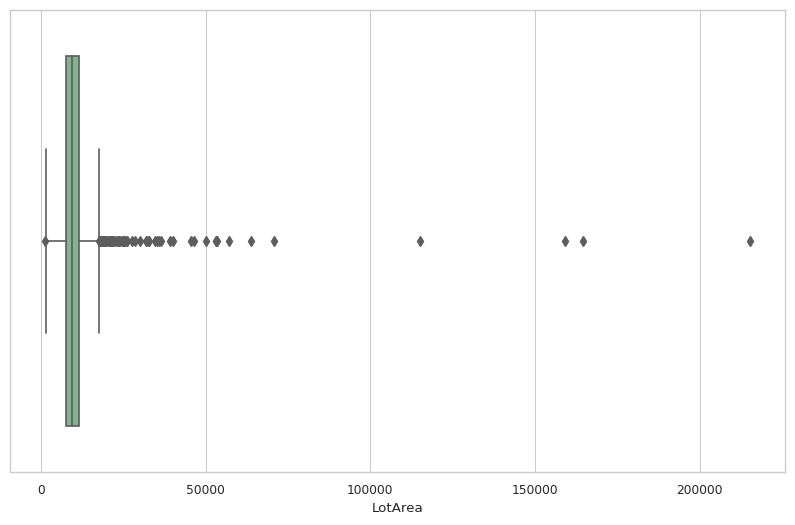

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x=train_data['LotArea'])
plt.show()

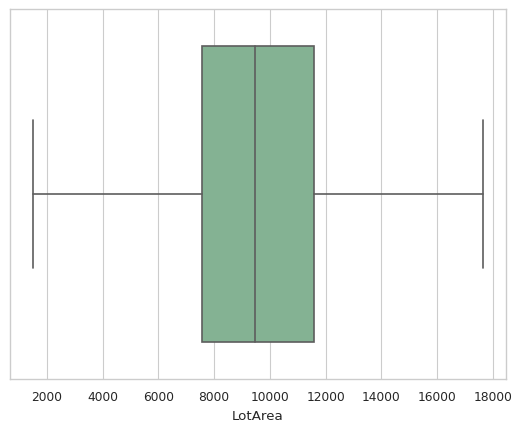

In [21]:
# It seems there could be outliers in this column
sns.boxplot(x=train_data['LotArea'], showfliers=False)
plt.show()

In [22]:
def percentiles(data):
    percentiles = {
      'Minimum': np.percentile(data, 0),
      '25th Percentile (Q1)': np.percentile(data, 25),
      '50th Percentile (Median)': np.percentile(data, 50),
      '75th Percentile (Q3)': np.percentile(data, 75),
      '90th Percentile': np.percentile(data, 90),
      '95th Percentile': np.percentile(data, 95),
      'Maximum': np.percentile(data, 100)
  }
    return percentiles

In [23]:
percentiles(train_data['LotArea'])

{'Minimum': 1300.0,
 '25th Percentile (Q1)': 7549.0,
 '50th Percentile (Median)': 9477.0,
 '75th Percentile (Q3)': 11603.0,
 '90th Percentile': 14388.400000000003,
 '95th Percentile': 17402.3,
 'Maximum': 215245.0}

In [24]:
np.percentile(train_data['LotArea'], 100)/np.percentile(train_data['LotArea'], 95)

12.368767346844958

The maximum value of the LotArea variable is more than 12 times the 95th percentile.

<Axes: xlabel='LotArea', ylabel='SalePrice'>

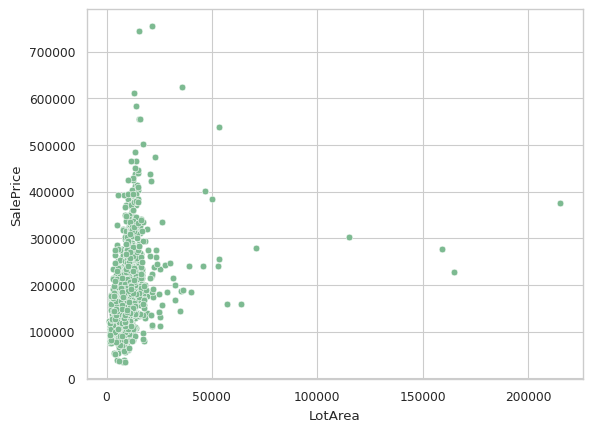

In [25]:
sns.scatterplot(data=train_data, x='LotArea', y='SalePrice')

In [26]:
train_data[['LotArea', 'SalePrice']].corr()

,LotArea,SalePrice
LotArea,1.000000,0.263837
SalePrice,0.263837,1.000000


In [27]:
filtered_by_area = train_data[train_data['LotArea'] < 18000]
filtered_by_area[['LotArea', 'SalePrice']].corr()

,LotArea,SalePrice
LotArea,1.000000,0.428063
SalePrice,0.428063,1.000000


<Axes: xlabel='LotArea', ylabel='SalePrice'>

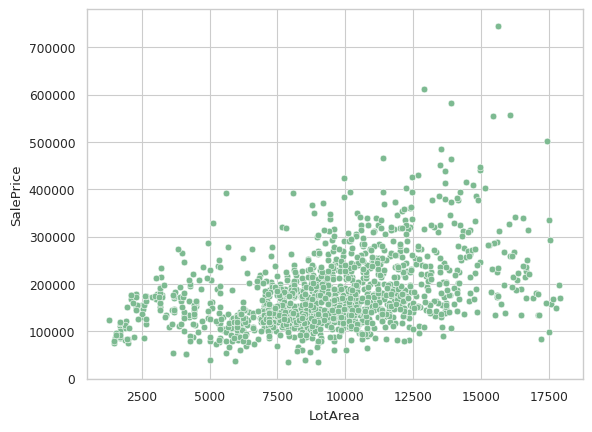

In [28]:
sns.scatterplot(data=filtered_by_area, x='LotArea', y='SalePrice')

## Street: Type of road access to property

In [29]:
def plot_count(df, feature):
    f, ax = plt.subplots(1,1,figsize=(8,6))
    sns.countplot(x=feature, data=df, palette='crest', order=df[feature].value_counts().index)
    ax.set_title(f"Number of records/{feature}")

    total = float(len(train_data))
    for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                             height,
                             '{:1.1f}%'.format(100*height/total),
                             ha='center', fontsize=10)
    plt.show()

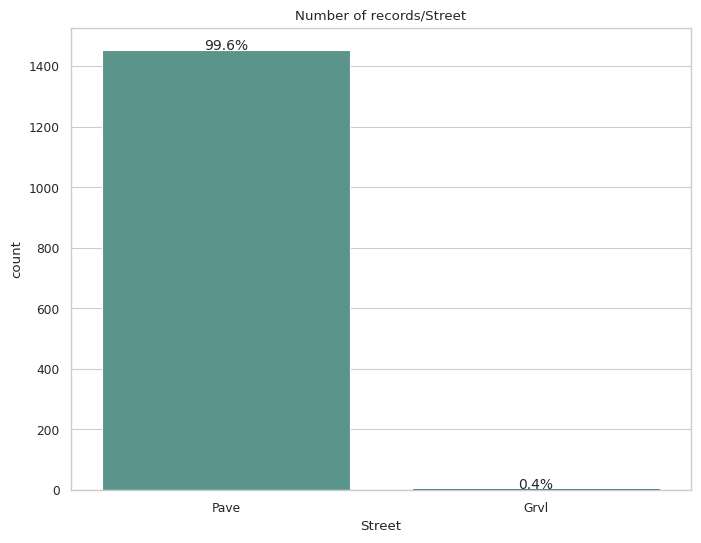

In [30]:
plot_count(train_data, 'Street')

<Axes: xlabel='Street', ylabel='SalePrice'>

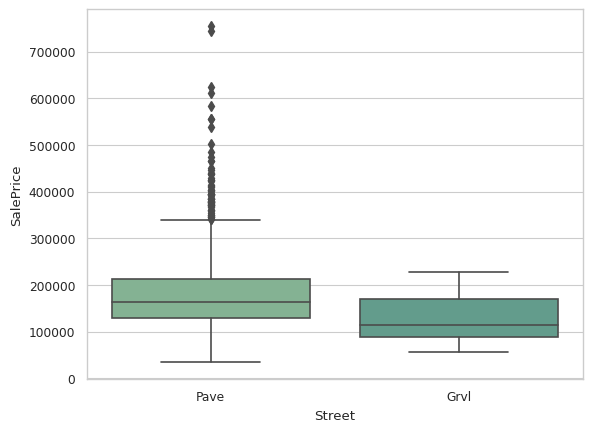

In [31]:
sns.boxplot(x='Street', y='SalePrice', data=train_data)

In [32]:
def plot_distrib(data, feature1, feature2):
    sns.boxplot(x = feature1, y = feature2, palette = color_list, data = data)
    sns.displot(data, x=feature2, col=feature1, color = color_list[0])
    plt.show()

## LotShape: General shape of property

* Reg	- Regular
* IR1	- Slightly irregular
* IR2	- Moderately Irregular
* IR3	- Irregular

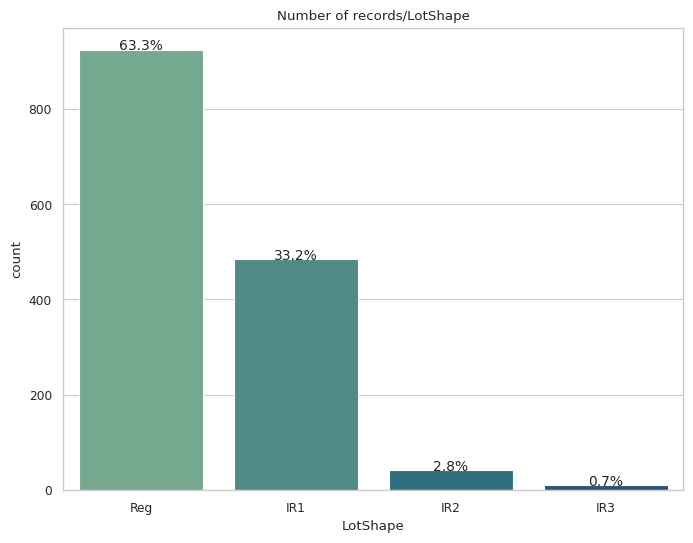

In [33]:
plot_count(train_data, 'LotShape')

<Axes: xlabel='LotShape', ylabel='SalePrice'>

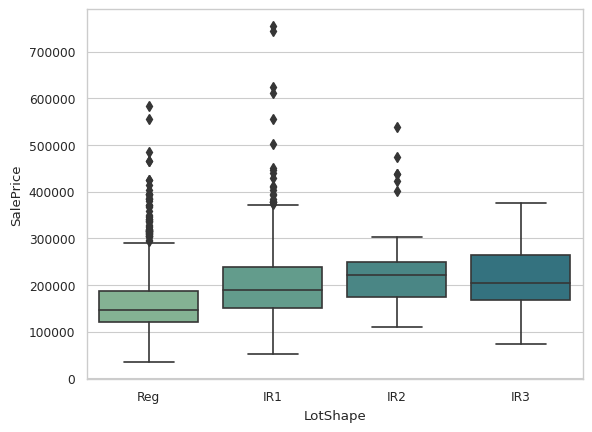

In [34]:
sns.boxplot(x='LotShape', y='SalePrice', data=train_data)

## LandContour: Flatness of the property

* Lvl - Near Flat/Level	
* Bnk - Banked - Quick and significant rise from street grade to building
* HLS - Hillside - Significant slope from side to side
* Low - Depression

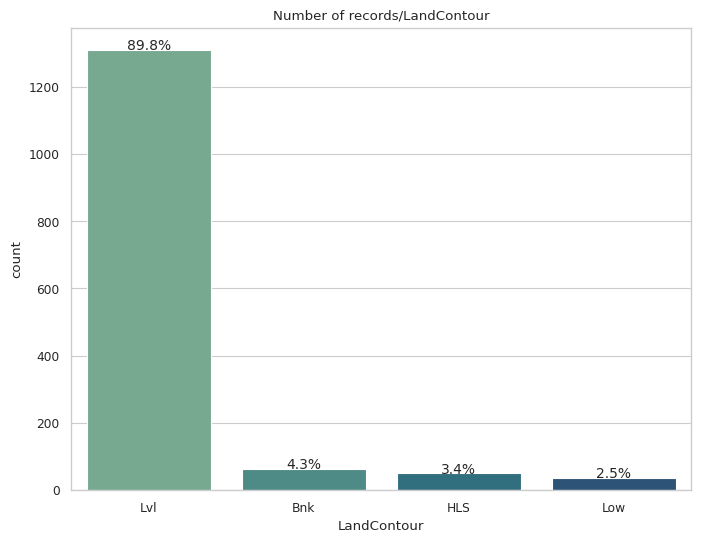

In [35]:
plot_count(train_data, 'LandContour')

<Axes: xlabel='LandContour', ylabel='SalePrice'>

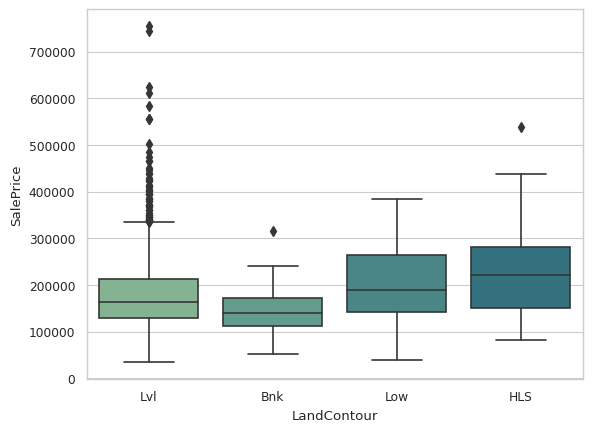

In [36]:
sns.boxplot(x='LandContour', y='SalePrice', data=train_data)

## LotConfig: Lot configuration

* Inside - Inside lot
* Corner - Corner lot
* CulDSac - Cul-de-sac
* FR2 - Frontage on 2 sides of property
* FR3 - Frontage on 3 sides of property

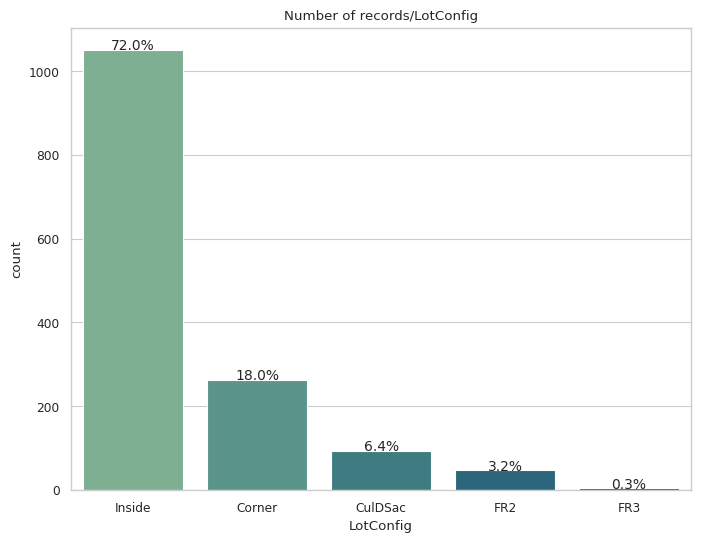

In [37]:
plot_count(train_data, 'LotConfig')

## LandSlope: Slope of property
		
* Gtl - Gentle slope
* Mod - Moderate Slope	
* Sev - Severe Slope

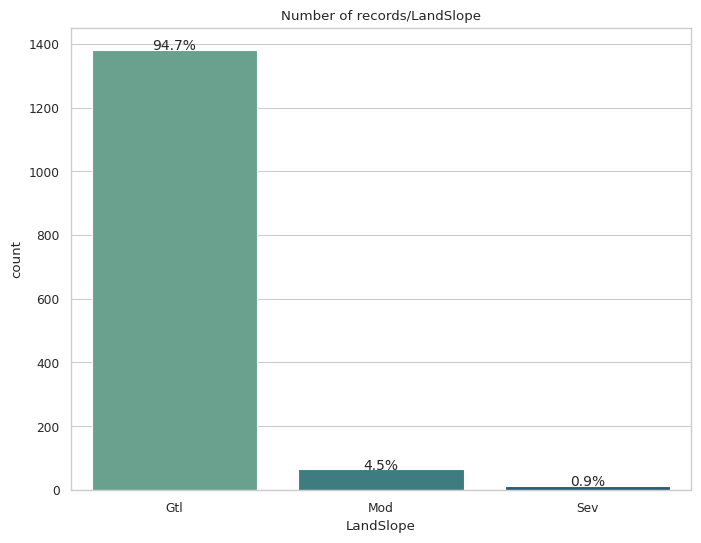

In [38]:
plot_count(train_data, 'LandSlope')

## Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [39]:
def plot_count_h(df, feature):
    f, ax = plt.subplots(1,1,figsize=(8,6))
    sns.countplot(y=feature, data=df, orient='h', order=df[feature].value_counts().index, palette='crest')
    plt.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
    ax.set_title(f"Number of records/{feature}")
    
    plt.show()

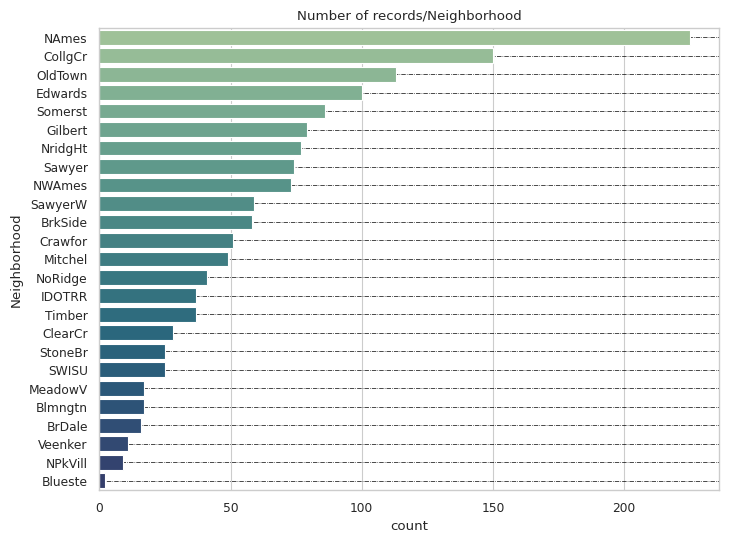

In [40]:
plot_count_h(train_data, 'Neighborhood')

<Axes: xlabel='SalePrice', ylabel='Neighborhood'>

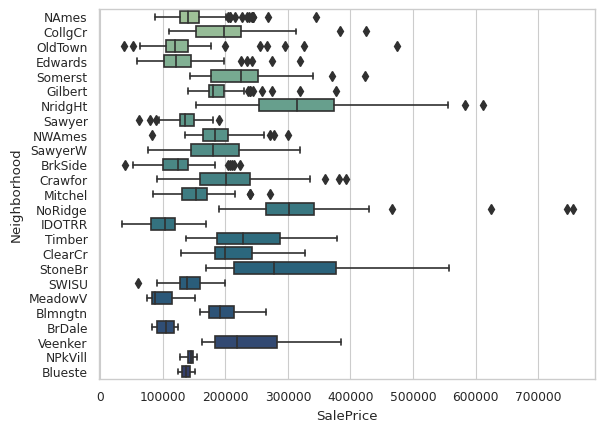

In [41]:
sns.boxplot(y='Neighborhood', x='SalePrice', data=train_data, order=train_data['Neighborhood'].value_counts().index, palette='crest')

## Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	    Normal	
       RRNn	    Within 200' of North-South Railroad
       RRAn	    Adjacent to North-South Railroad
       PosN	    Near positive off-site feature--park, greenbelt, etc.
       PosA	    Adjacent to postive off-site feature
       RRNe	    Within 200' of East-West Railroad
       RRAe	    Adjacent to East-West Railroad

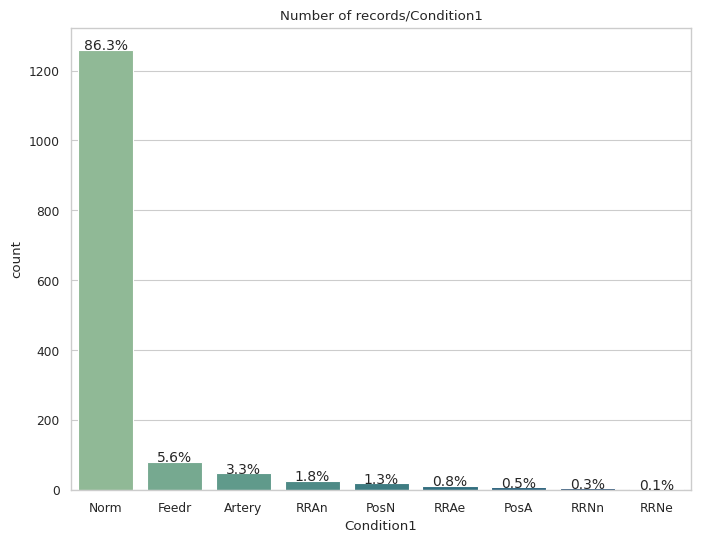

In [42]:
plot_count(train_data, 'Condition1')

## Condition2: Proximity to various conditions (if more than one is present)

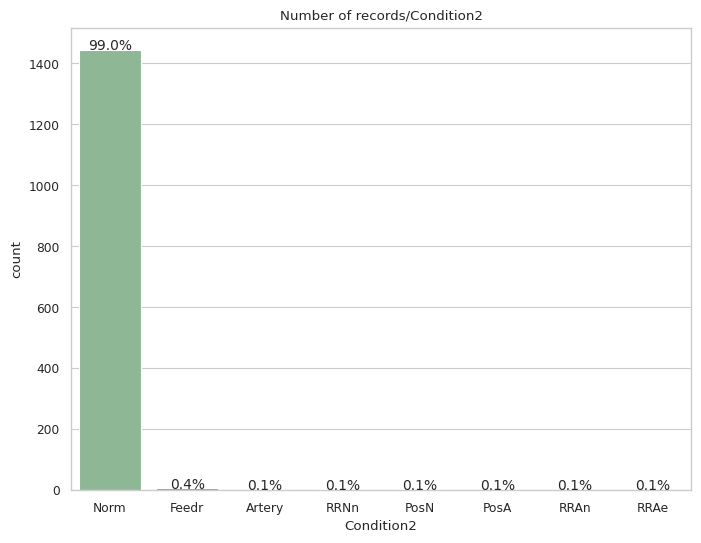

In [43]:
plot_count(train_data, 'Condition2')

## BldgType: Type of dwelling
		
       1Fam	    Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

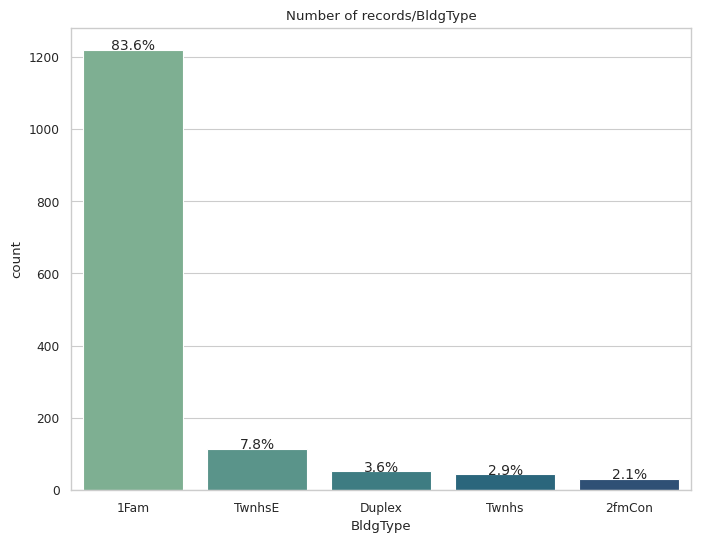

In [44]:
plot_count(train_data, 'BldgType')

## HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	    Split Level

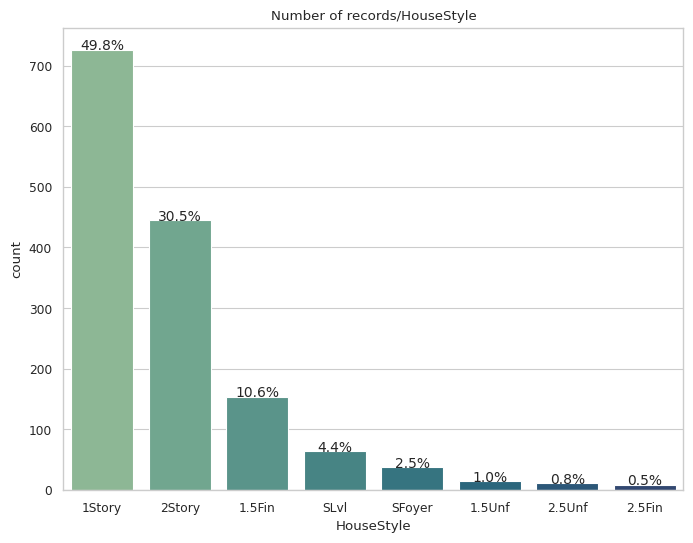

In [45]:
plot_count(train_data, 'HouseStyle')

## OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

This variable is ordered categorical; while the values have specific meanings, they are ordered from low to high, corresponding to higher-rated quality.

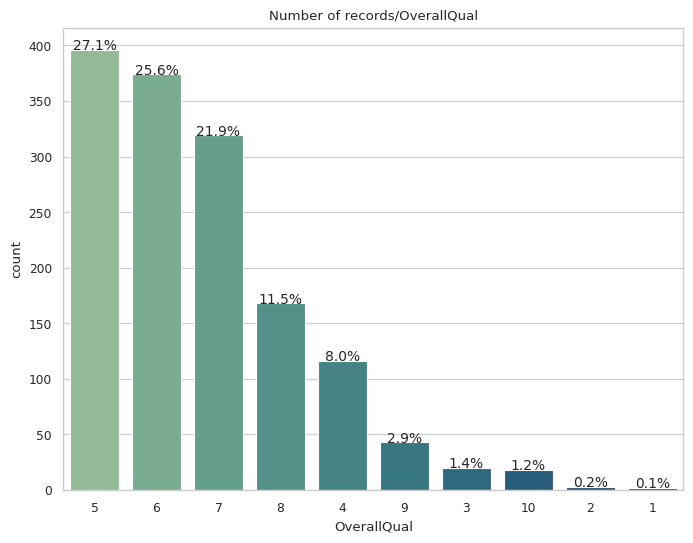

In [46]:
plot_count(train_data, 'OverallQual')

## OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

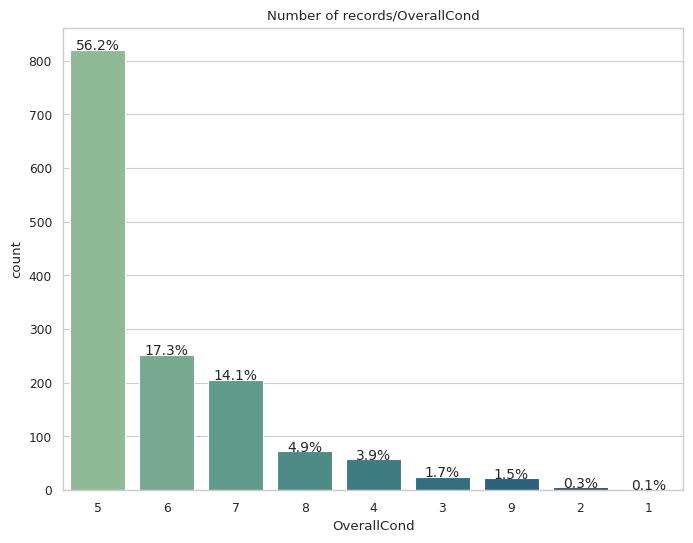

In [47]:
plot_count(train_data, 'OverallCond')

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


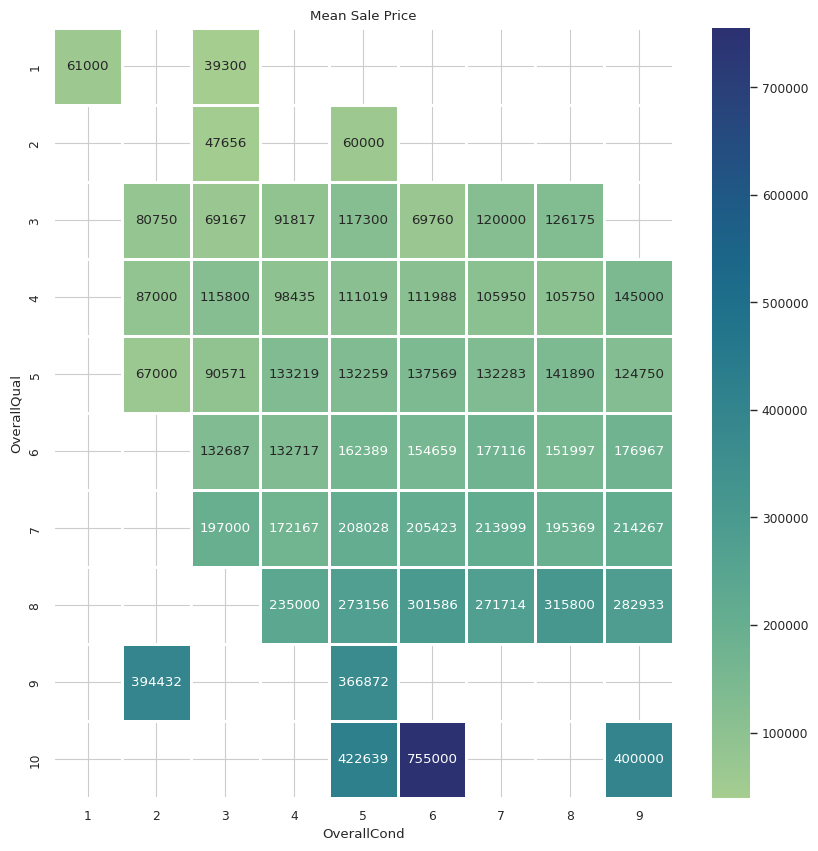

In [48]:
qual_cond = train_data.pivot_table(values='SalePrice',index='OverallQual', columns='OverallCond', aggfunc='mean')
f, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(qual_cond, cmap='crest',linecolor='white',linewidths=1, annot=True, fmt=".0f")
ax.set_title('Mean Sale Price')
plt.show()

From the heatmap above, we can observe that overall quality appears to have a significantly greater impact on the mean sale price of the house. Let’s also check the correlation coefficients.

<Axes: >

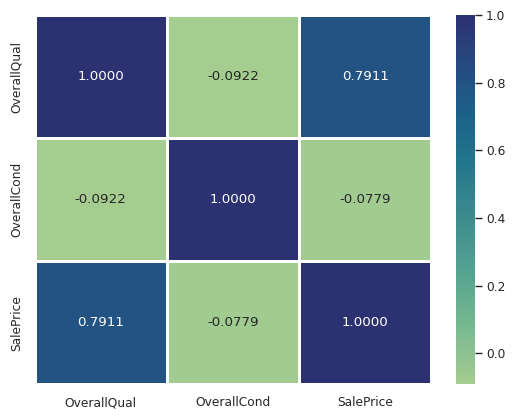

In [49]:
cor1 = train_data[['OverallQual','OverallCond','SalePrice']].corr()
sns.heatmap(cor1, cmap='crest',linecolor='white',linewidths=1, annot=True, fmt=".4f")

Overall quality has a high positive correlation coefficient with the sale price, while overall condition has almost no correlation with the price.

## YearBuilt: Original construction date

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


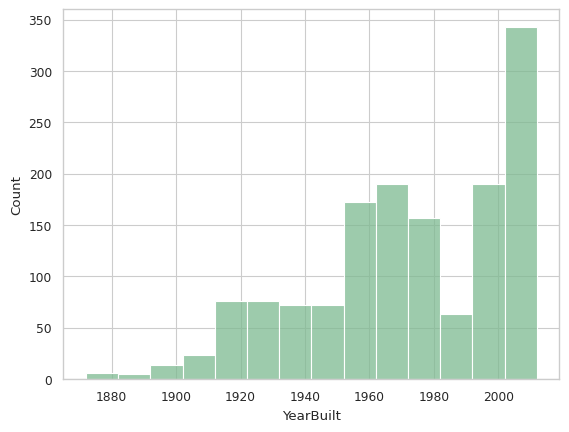

In [50]:
sns.histplot(train_data['YearBuilt'],kde=False, binwidth=10)
plt.show()

## YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


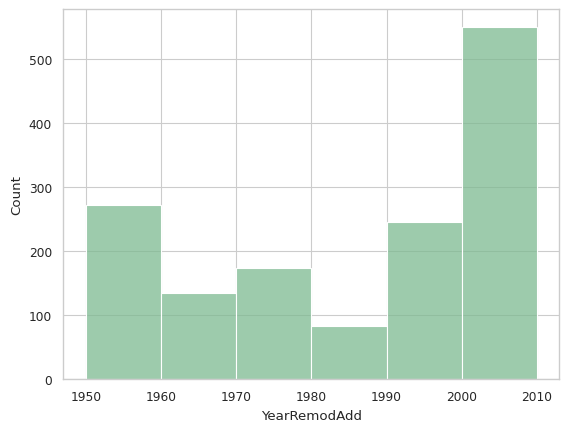

In [51]:
sns.histplot(train_data['YearRemodAdd'],kde=False, binwidth=10)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


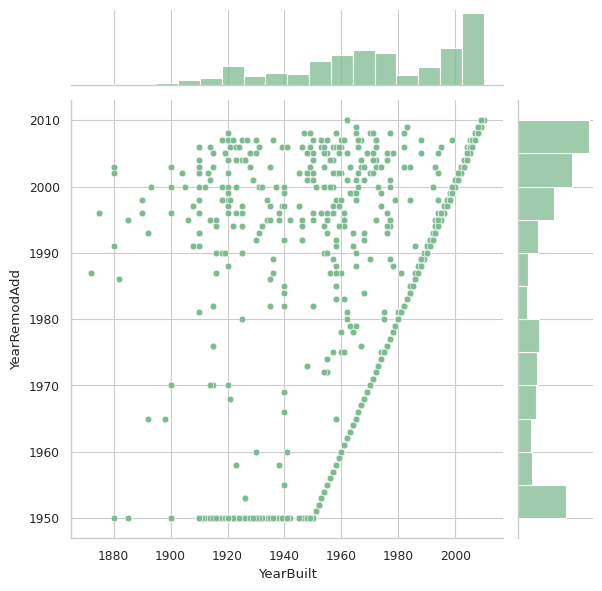

In [52]:
sns.jointplot(x='YearBuilt',y='YearRemodAdd',data=train_data,kind='scatter')

Let's create features YrFBuild and YrFRemod, which represent the number of years that have passed since the house was built and since the last remodeling, respectively.

In [53]:
train_data['YrFBuild'] = train_data['YrSold'] - train_data['YearBuilt']
train_data['YrFRemod'] = train_data['YrSold'] - train_data['YearRemodAdd']
train_data.head(5)

,Id,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,YrFBuild,YrFRemod
0,1,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,856,854,0,1710,2,1,3,1,8,0,Y,0,61,0,0,0,0,0,2,2008,Normal,208500,5,5
1,2,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,TA,TA,CBlock,GasA,Ex,Y,SBrkr,1262,0,0,1262,2,0,3,1,6,1,Y,298,0,0,0,0,0,0,5,2007,Normal,181500,31,31
2,3,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,920,866,0,1786,2,1,3,1,6,1,Y,0,42,0,0,0,0,0,9,2008,Normal,223500,7,6
3,4,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,TA,TA,BrkTil,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,3,1,7,1,Y,0,35,272,0,0,0,0,2,2006,Abnorml,140000,91,36
4,5,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,1145,1053,0,2198,2,1,4,1,9,1,Y,192,84,0,0,0,0,0,12,2008,Normal,250000,8,8


<Axes: >

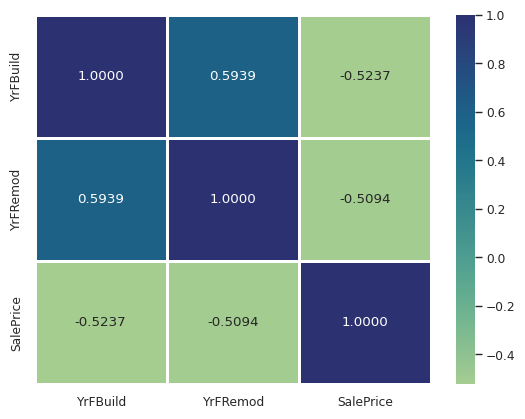

In [54]:
cor2 = train_data[['YrFBuild','YrFRemod','SalePrice']].corr()
sns.heatmap(cor2, cmap='crest',linecolor='white',linewidths=1, annot=True, fmt=".4f")

Both variables have a modest negative correlation with sale price.

## RoofStyle: Type of roof

* Flat - Flat 
* Gable - Gable 
* Gambrel - Gabrel (Barn) 
* Hip - Hip 
* Mansard - Mansard 
* Shed - Shed

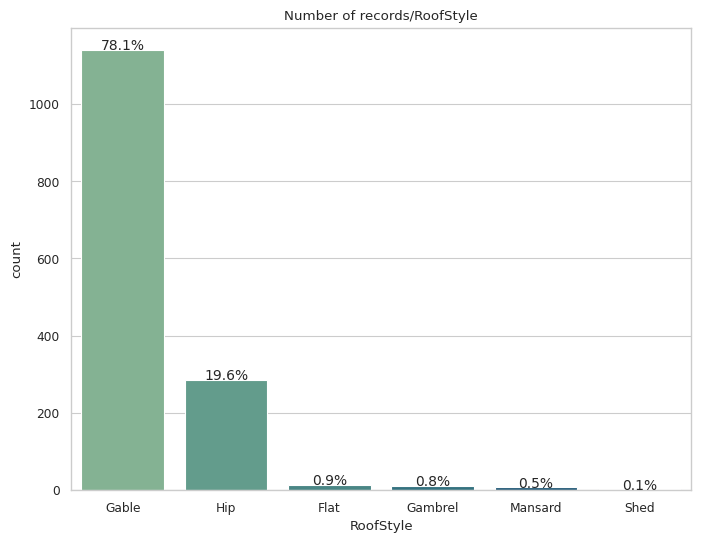

In [55]:
plot_count(train_data, 'RoofStyle')

<Axes: xlabel='SalePrice', ylabel='RoofStyle'>

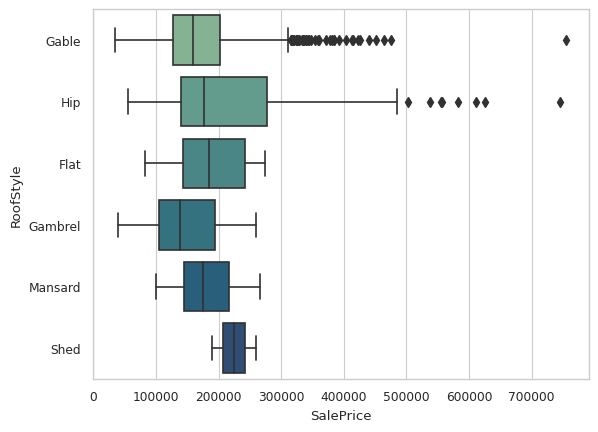

In [56]:
sns.boxplot(y='RoofStyle', x='SalePrice', data=train_data, order=train_data['RoofStyle'].value_counts().index, palette='crest')

## RoofMatl: Roof material

* ClyTile - Clay or Tile
* CompShg - Standard (Composite) Shingle
* Membran - Membrane
* Metal - Metal
* Roll - Roll
* Tar&Grv - Gravel & Tar
* WdShake - Wood Shakes
* WdShngl - Wood Shingles

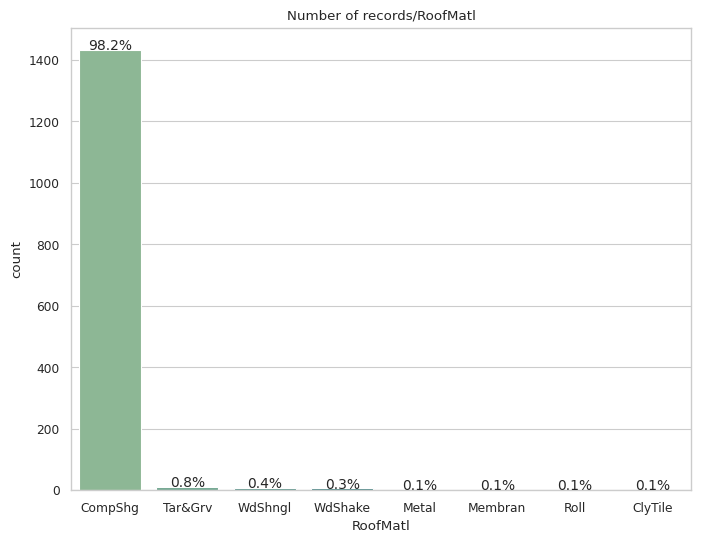

In [57]:
plot_count(train_data, 'RoofMatl')

## ExterQual: Evaluates the quality of the material on the exterior 
		
* Ex - Excellent
* Gd - Good
* TA - Average/Typical
* Fa - Fair
* Po - Poor

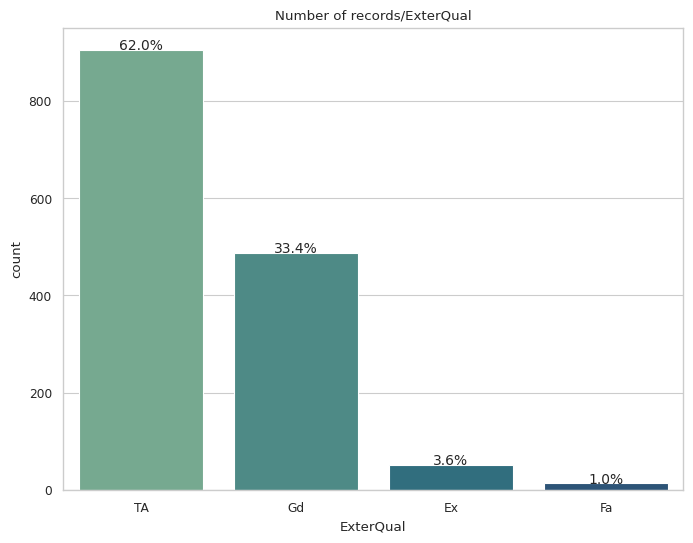

In [58]:
plot_count(train_data, 'ExterQual')

<Axes: xlabel='SalePrice', ylabel='ExterQual'>

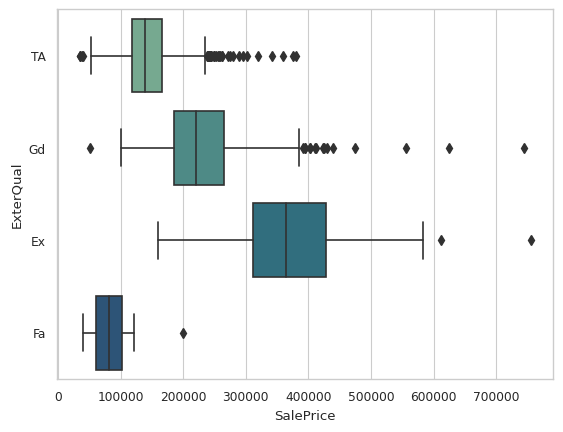

In [59]:
sns.boxplot(y='ExterQual', x='SalePrice', data=train_data, order=train_data['ExterQual'].value_counts().index, palette='crest')

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


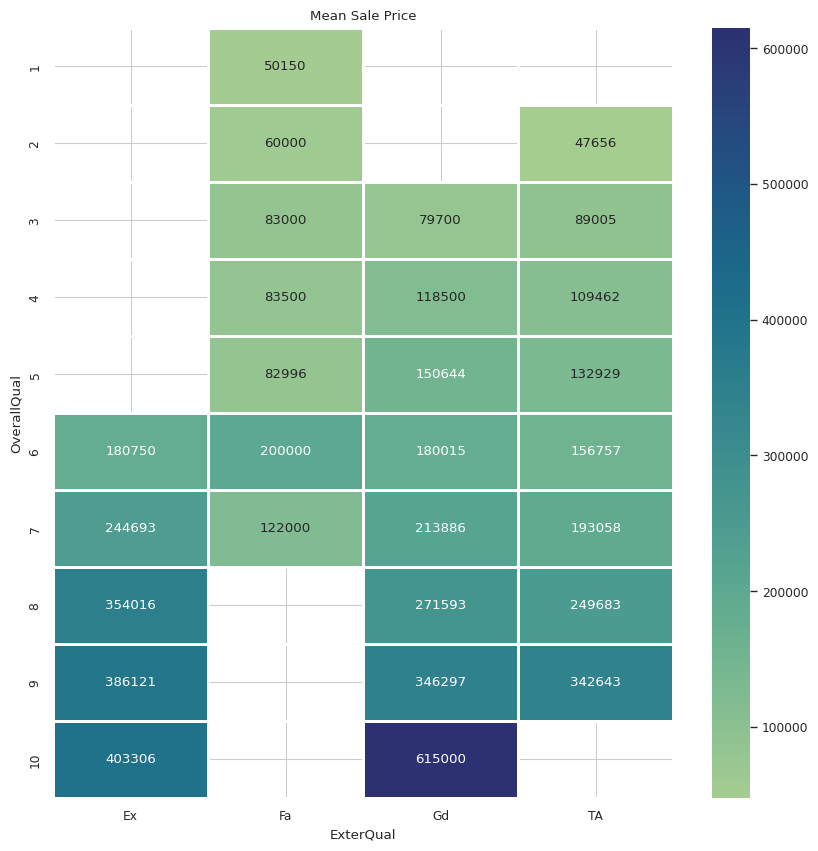

In [60]:
ext_qual_price = train_data.pivot_table(values='SalePrice',index='OverallQual', columns='ExterQual', aggfunc='mean')
f, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(ext_qual_price, cmap='crest',linecolor='white',linewidths=1, annot=True, fmt=".0f")
ax.set_title('Mean Sale Price')
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


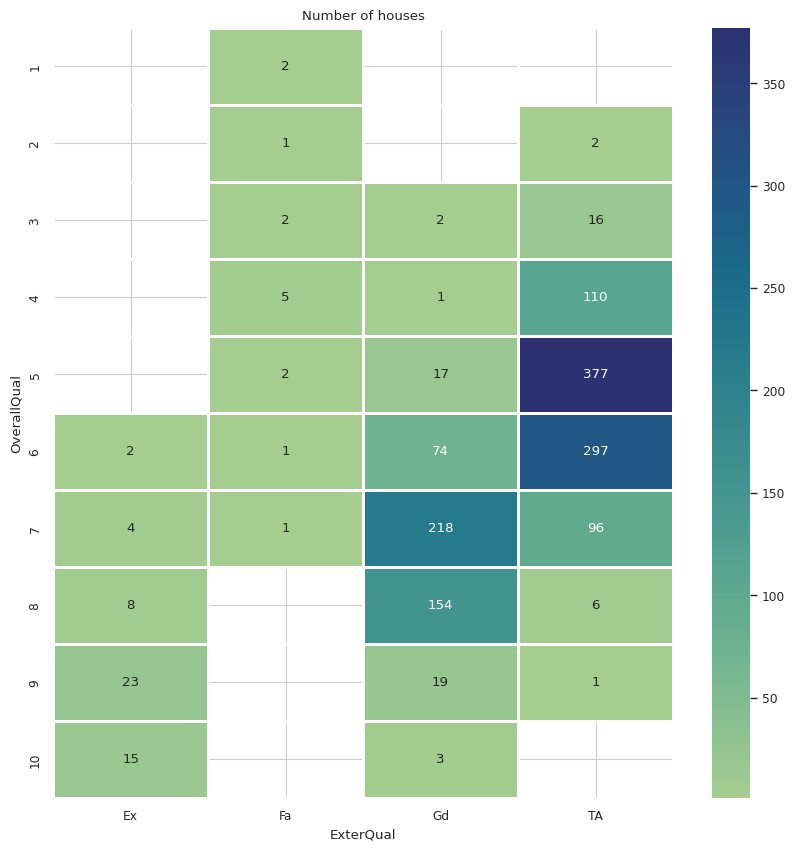

In [61]:
ext_qual_numb = train_data.pivot_table(values='Id',index='OverallQual', columns='ExterQual', aggfunc='count')
f, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(ext_qual_numb, cmap='crest',linecolor='white',linewidths=1, annot=True, fmt=".0f")
ax.set_title('Number of houses')
plt.show()

Most houses with excellent-quality materials on the exterior have an Overall quality score of 9 or 10. 
Most houses with good-quality exterior materials have an Overall quality rating between 6 and 8.
Most of the houses with typical quality of exterior materials have an Overall quality between 4 and 7.
The overall quality score for houses with fair quality of exterior materials is concentrated at the lower end of the scale.

OverallQual variable is quite representative of the quality of exterior materials.

## ExterCond: Evaluates the present condition of the material on the exterior
		
* Ex - Excellent
* Gd - Good
* TA - Average/Typical
* Fa - Fair
* Po - Poor

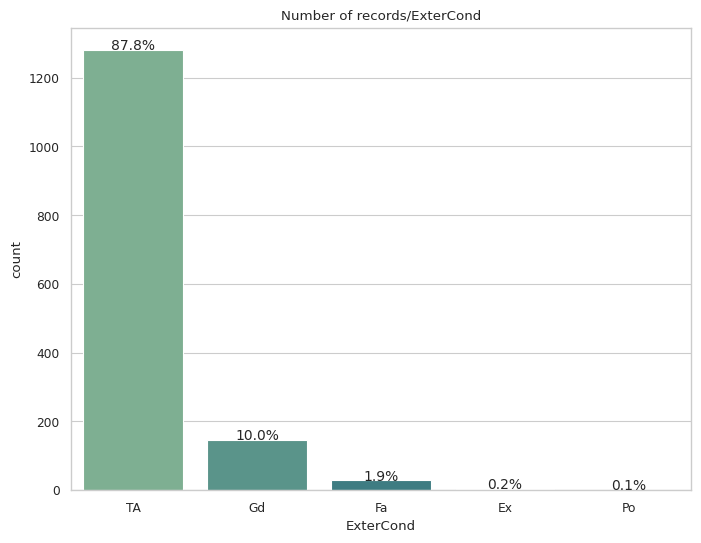

In [62]:
plot_count(train_data, 'ExterCond')

<Axes: xlabel='SalePrice', ylabel='ExterCond'>

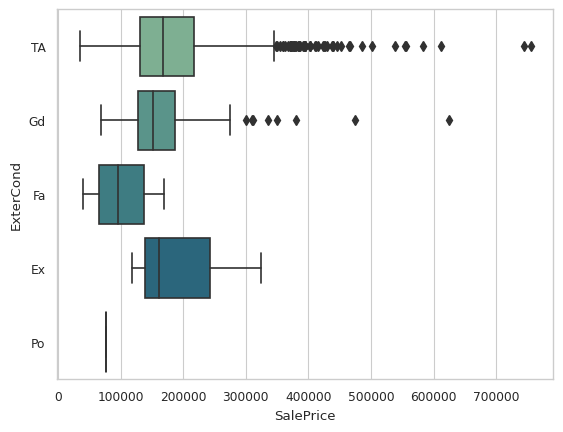

In [63]:
sns.boxplot(y='ExterCond', x='SalePrice', data=train_data, order=train_data['ExterCond'].value_counts().index, palette='crest')

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


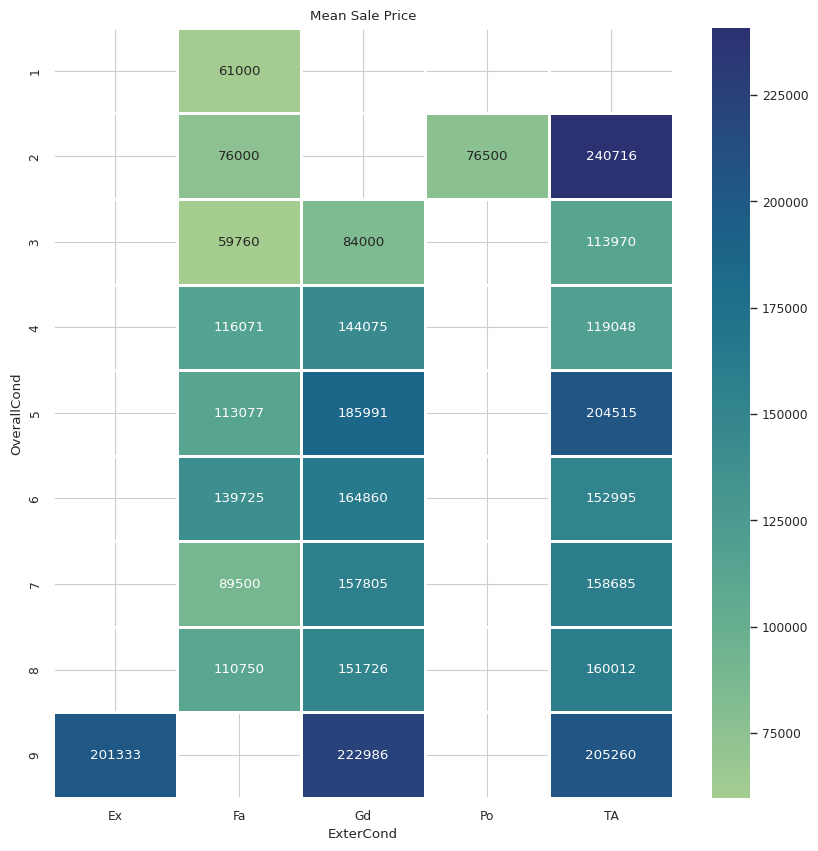

In [64]:
ext_cond_price = train_data.pivot_table(values='SalePrice',index='OverallCond', columns='ExterCond', aggfunc='mean')
f, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(ext_cond_price, cmap='crest',linecolor='white',linewidths=1, annot=True, fmt=".0f")
ax.set_title('Mean Sale Price')
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


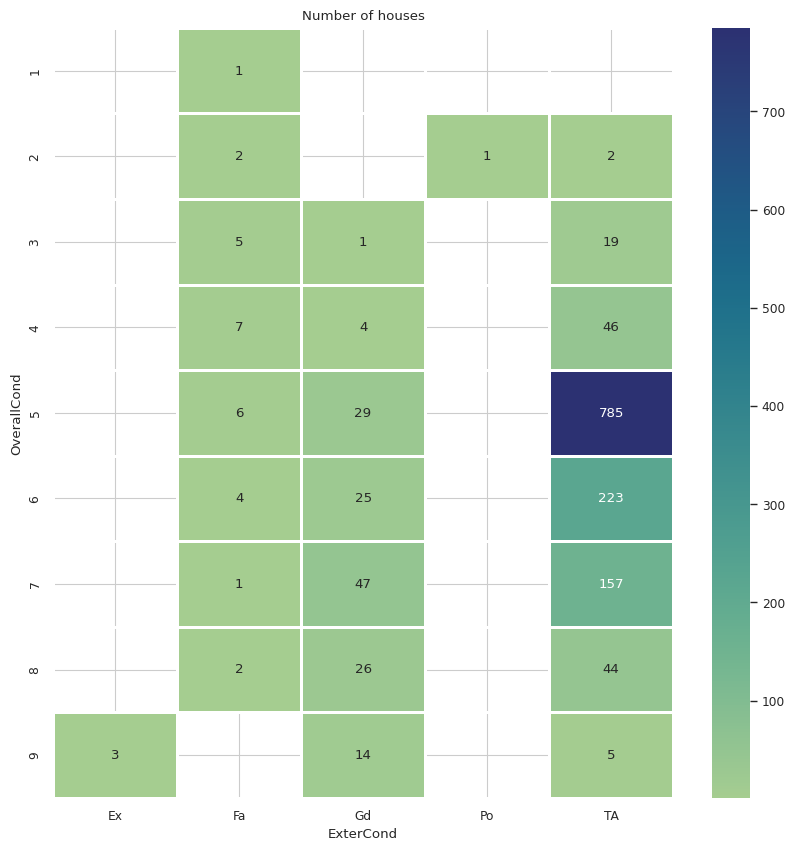

In [65]:
ext_cond_numb = train_data.pivot_table(values='Id',index='OverallCond', columns='ExterCond', aggfunc='count')
f, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(ext_cond_numb, cmap='crest',linecolor='white',linewidths=1, annot=True, fmt=".0f")
ax.set_title('Number of houses')
plt.show()

The majority of houses have a typical condition of the material on the exterior and have an Overall condition score between 5 and 7.

## Foundation: Type of foundation
		
* BrkTil - Brick & Tile
* CBIlock - Cinder Block
* PConc - Poured Contrete	
* Slab - Slab
* Stone - Stone
* Wood - Wood

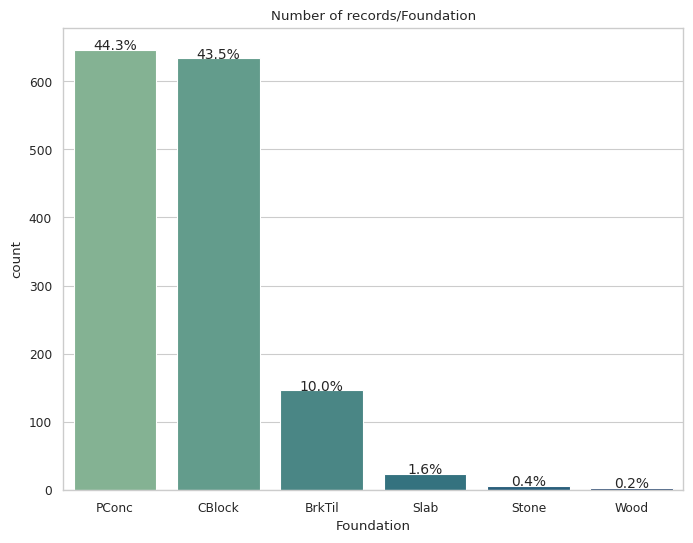

In [66]:
plot_count(train_data, 'Foundation')

<Axes: xlabel='SalePrice', ylabel='Foundation'>

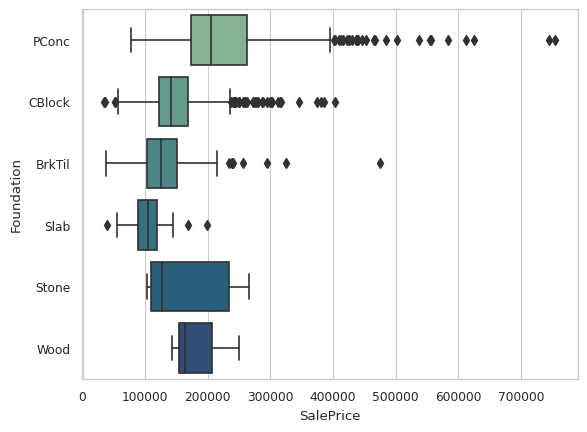

In [67]:
sns.boxplot(y='Foundation', x='SalePrice', data=train_data, order=train_data['Foundation'].value_counts().index, palette='crest')

## GrLivArea: Above grade (ground) living area square feet

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


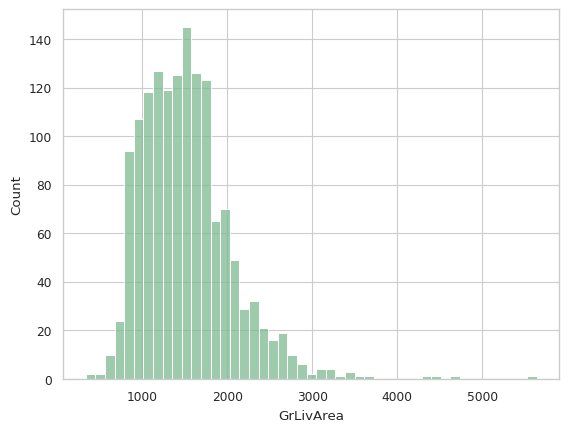

In [68]:
sns.histplot(train_data['GrLivArea'], kde=False)
plt.show()

<Axes: >

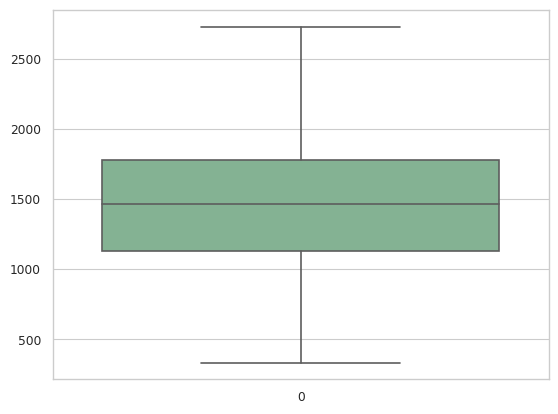

In [69]:
sns.boxplot(train_data['GrLivArea'], showfliers=False)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

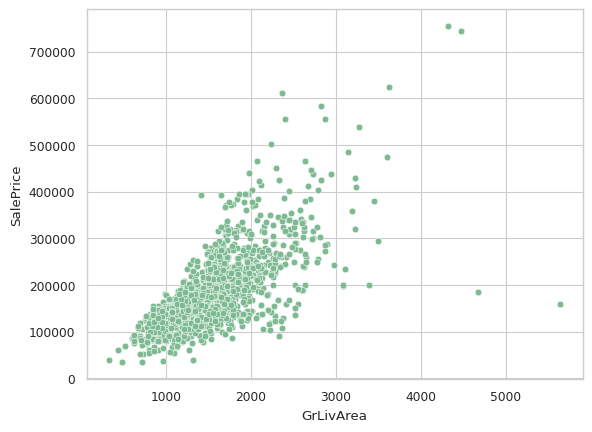

In [70]:
sns.scatterplot(data=train_data, x='GrLivArea', y='SalePrice')

In [71]:
train_data[['GrLivArea', 'SalePrice']].corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708618
SalePrice,0.708618,1.000000


## TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

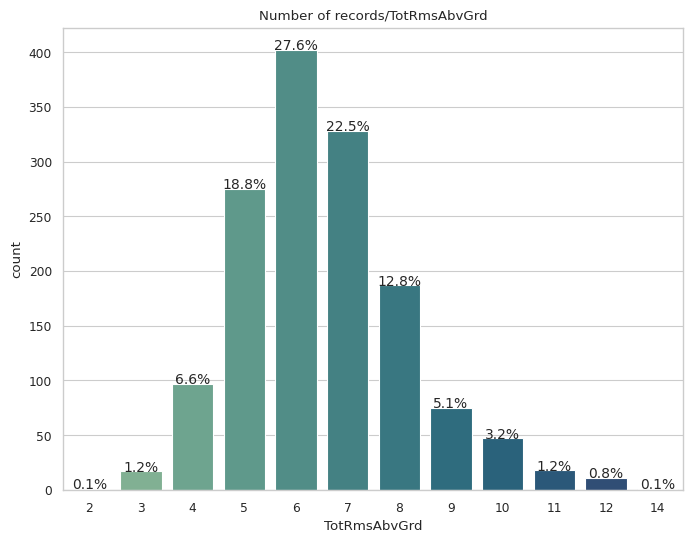

In [72]:
f, ax = plt.subplots(1,1,figsize=(8,6))
sns.countplot(x='TotRmsAbvGrd', data=train_data, palette='crest')
ax.set_title(f"Number of records/{'TotRmsAbvGrd'}")

total = float(len(train_data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
        height,
        '{:1.1f}%'.format(100*height/total),
        ha='center', fontsize=10)
plt.show()

<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

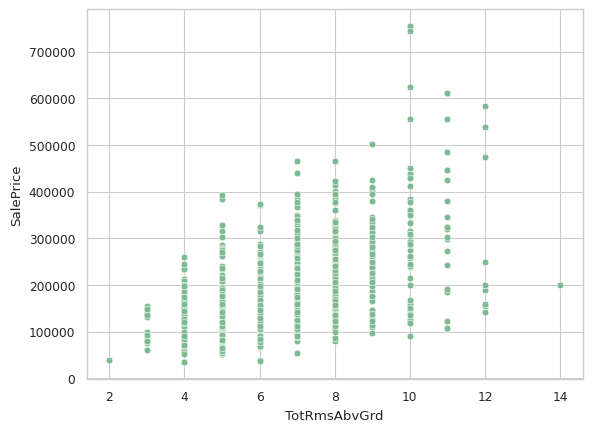

In [73]:
sns.scatterplot(data=train_data, x='TotRmsAbvGrd', y='SalePrice')

In [74]:
train_data[['TotRmsAbvGrd', 'SalePrice']].corr()

,TotRmsAbvGrd,SalePrice
TotRmsAbvGrd,1.000000,0.533779
SalePrice,0.533779,1.000000


## FullBath: Full bathrooms above grade

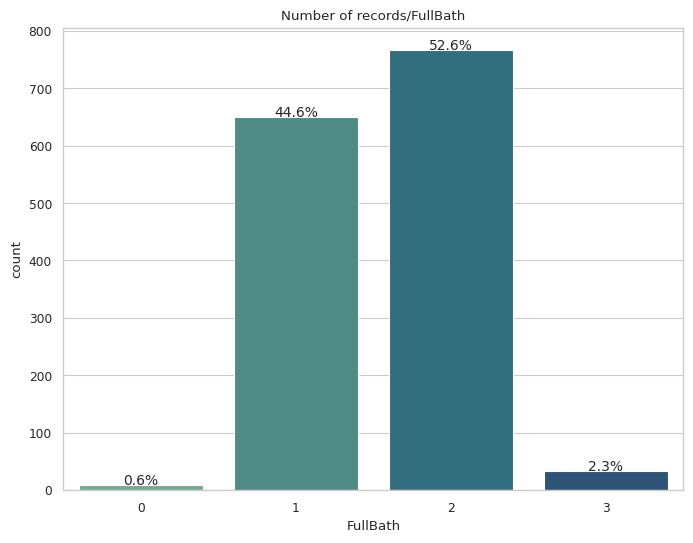

In [75]:
f, ax = plt.subplots(1,1,figsize=(8,6))
sns.countplot(x='FullBath', data=train_data, palette='crest')
ax.set_title(f"Number of records/{'FullBath'}")

total = float(len(train_data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
        height,
        '{:1.1f}%'.format(100*height/total),
        ha='center', fontsize=10)
plt.show()

In [76]:
train_data[['FullBath', 'SalePrice']].corr()

,FullBath,SalePrice
FullBath,1.000000,0.560881
SalePrice,0.560881,1.000000


# Multiple linear regression

Let's recall that multiple linear regression has the following main assumptions that provide validity to the results derived from the analysis:
* Linearity: Each predictor variable is linearly related to the outcome variable.
* Normality: The residuals are normally distributed.
* Independent observations: Each observation in the dataset is independent.
* Homoscedasticity: The variation of the residuals is constant or similar across the model.
* No multicollinearity: No two independent variables can be highly correlated with each other.

## Features selection 

In [77]:
cor = train_data.corr(method='pearson', numeric_only=True)

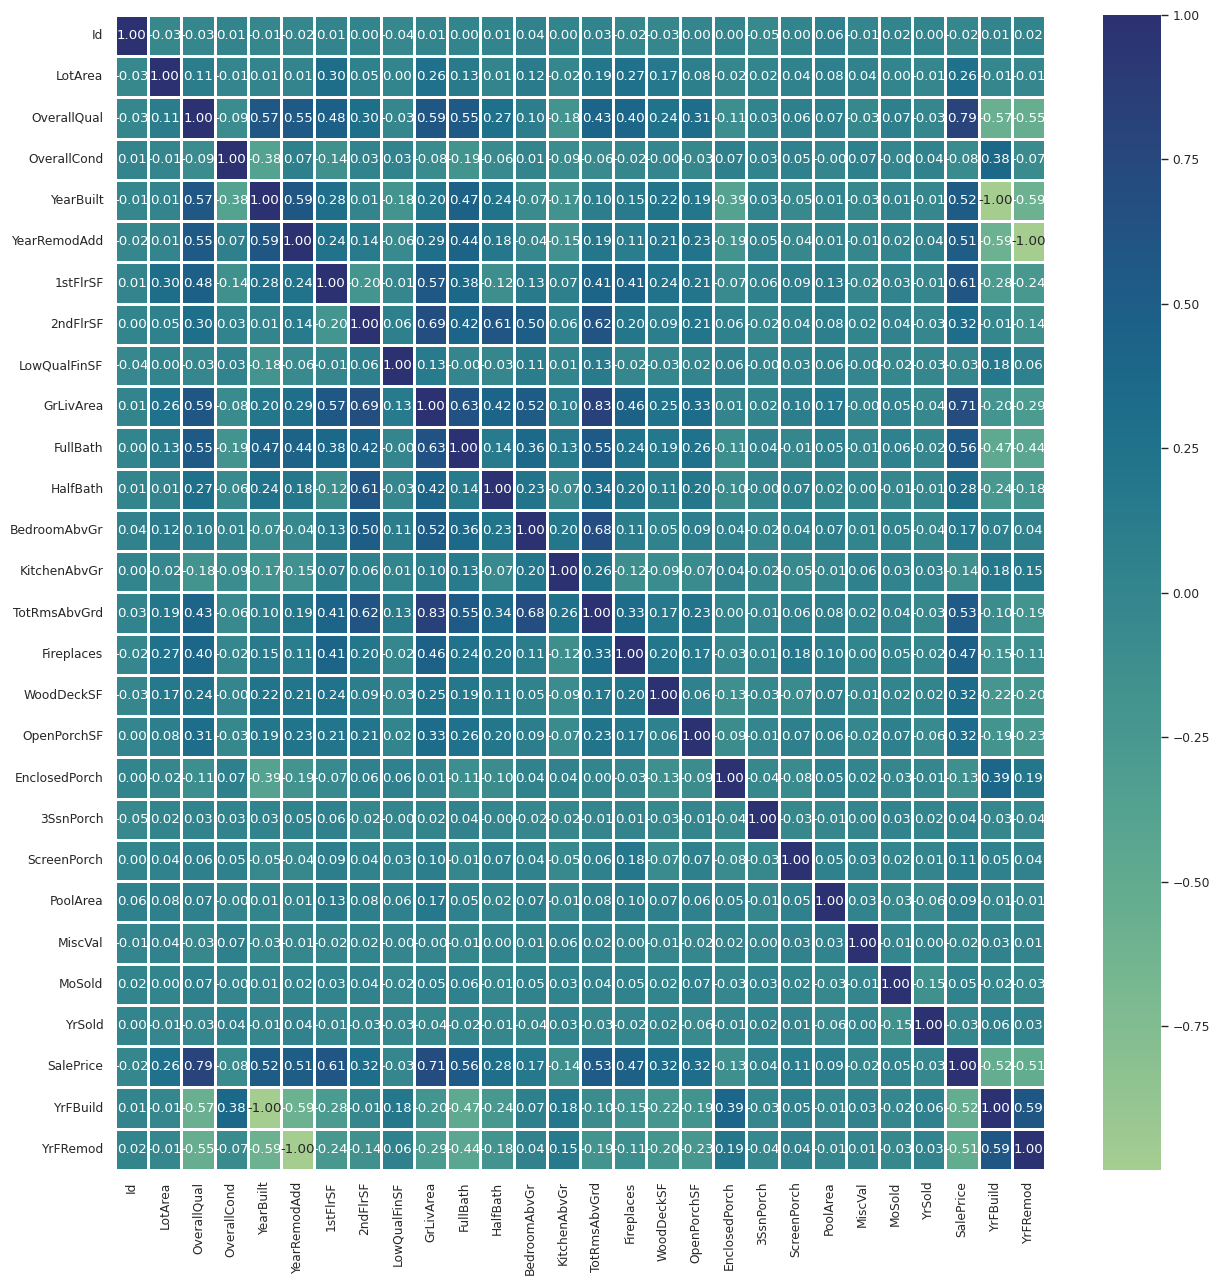

In [78]:
f, ax = plt.subplots(1,1,figsize=(15,15))
sns.heatmap(cor, cmap='crest',linecolor='white',linewidths=1, annot=True, fmt=".2f")
plt.show()

Let's select a subset of features that are highly or modestly correlated with SalePrice.

In [79]:
train_data.columns

Index(['Id', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition', 'SalePrice', 'YrFBuild', 'YrFRemod'],
      dtype='object')

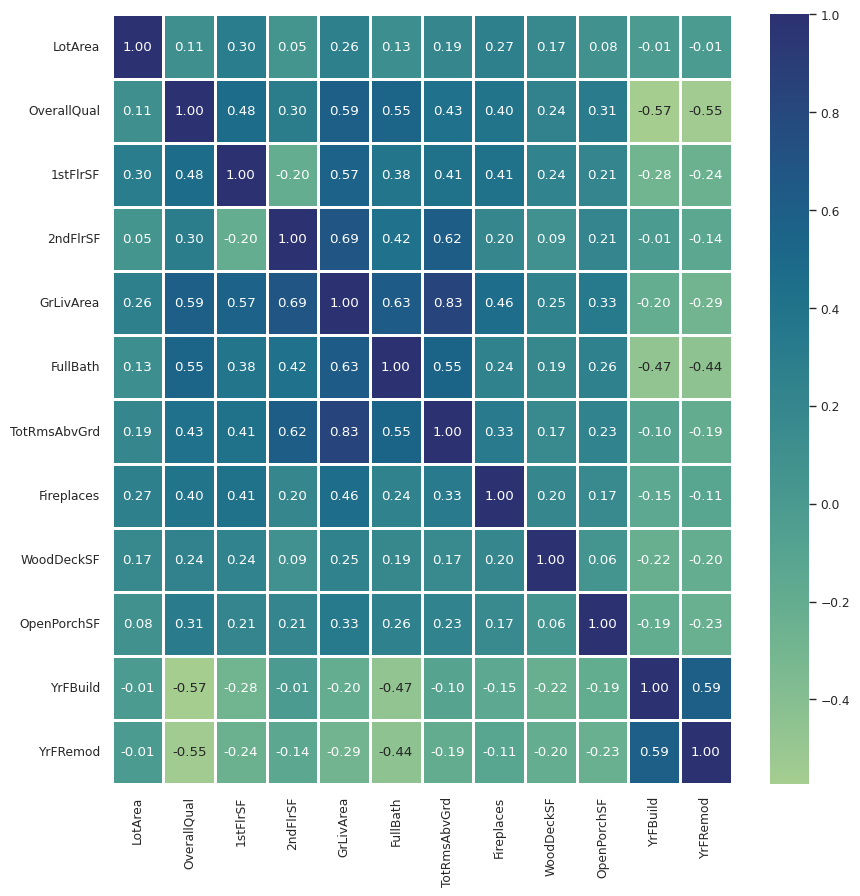

In [80]:
subset = train_data[['LotArea','OverallQual','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','YrFBuild', 'YrFRemod']]
cor_subset = subset.corr()
f, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(cor_subset, cmap='crest',linecolor='white',linewidths=1, annot=True, fmt=".2f")
plt.show()

Features '1stFlrSF', '2ndFlrSF' are correlated with 'GrLivArea'. Since they are all about area, we can leave just 'GrLivArea'. 

Also, features 'YrFBuild' and 'YrFRemod' are correlated. For some houses, the second one will be the same as the first one since remodeling was not done. However, for some buildings, being built many years ago can have historical significance, so I would rather preserve both features.

Features 'GrLivArea' and 'TotRmsAbvGrd' are highly correlated, but I also would keep them both.

## Version 1

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X = train_data[['LotArea','OverallQual','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','YrFBuild', 'YrFRemod']]
y = train_data['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lm = LinearRegression()

In [85]:
lm.fit(X_train, y_train)

LinearRegression()

In [86]:
coefs = pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coefficient'])
coefs

,Coefficient
LotArea,0.689780
OverallQual,23984.541113
GrLivArea,46.142068
FullBath,-6659.141276
TotRmsAbvGrd,2290.444508
Fireplaces,10230.931922
WoodDeckSF,42.683260
OpenPorchSF,5.637111
YrFBuild,-430.397023
YrFRemod,-317.757641


In [87]:
y_predict = lm.predict(X_val)

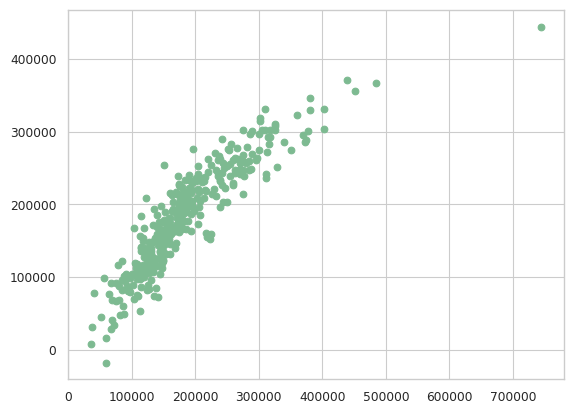

In [88]:
plt.scatter(y_val, y_predict)

In [89]:
from sklearn import metrics

In [90]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_predict)))

Mean Absolute Error: 24643.170251085172
Mean Squared Error: 1226096266.6218102
Root Mean Squared Error: 35015.6574495155


In [91]:
metrics.explained_variance_score(y_val, y_predict)

0.8131815743862836

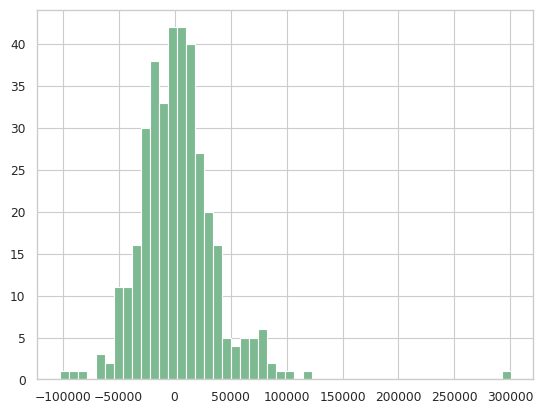

In [92]:
plt.hist((y_val-y_predict), bins=50)
plt.show()

Let's calculate the variance inflation factor, or VIF, for each independent variable. It is a way to quantify how much the variance of each variable is “inflated” due to correlation with other variables.

The smallest value a VIF can take on is 1, which would indicate 0 correlation between the X variable in question and the other predictor variables in the model. A high VIF, such as 5 and above, according to the statsmodels documentation, can indicate the presence of multicollinearity.

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])
df_vif

,VIF
LotArea,2.375044
OverallQual,21.597050
GrLivArea,40.458228
FullBath,18.592527
TotRmsAbvGrd,50.364249
Fireplaces,2.613008
WoodDeckSF,1.765962
OpenPorchSF,1.743023
YrFBuild,4.193866
YrFRemod,3.463227


Let's try to build a linear model without 'TotRmsAbvGrd', as it showed previously a high correlation coefficient with several features and has the highest variance inflation factor.

## Version 2

In [94]:
X = train_data[['LotArea','OverallQual','GrLivArea','FullBath','Fireplaces','WoodDeckSF','OpenPorchSF','YrFBuild', 'YrFRemod']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [95]:
lm.fit(X_train, y_train)

LinearRegression()

In [96]:
coefs = pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coefficient'])
coefs

,Coefficient
LotArea,0.686588
OverallQual,23831.954238
GrLivArea,52.063629
FullBath,-5786.180605
Fireplaces,9955.779933
WoodDeckSF,42.207318
OpenPorchSF,3.505931
YrFBuild,-419.327466
YrFRemod,-316.016261


In [97]:
y_predict = lm.predict(X_val)

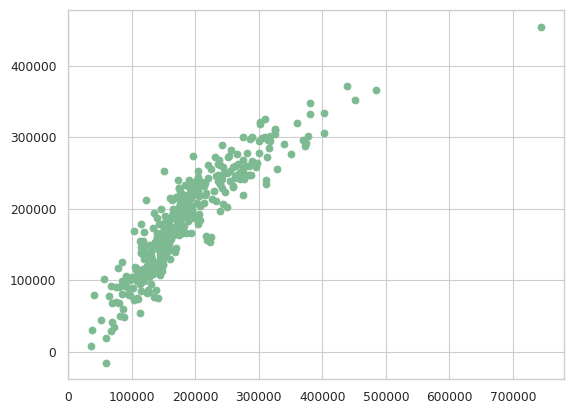

In [98]:
plt.scatter(y_val, y_predict)

In [99]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_predict)))

Mean Absolute Error: 24541.232704729893
Mean Squared Error: 1196710423.5147855
Root Mean Squared Error: 34593.5026199254


In [100]:
metrics.explained_variance_score(y_val, y_predict)

0.817585274865435

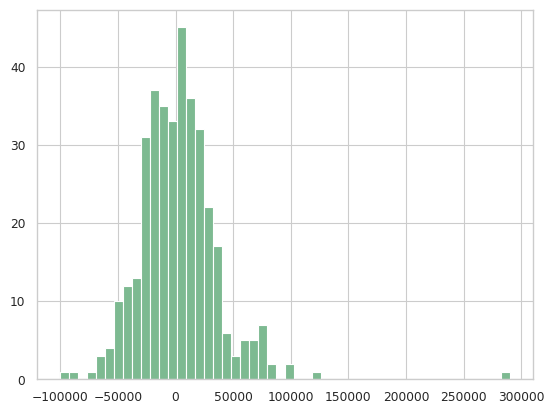

In [101]:
plt.hist((y_val-y_predict), bins=50)
plt.show()

In [102]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])
df_vif

,VIF
LotArea,2.374952
OverallQual,19.306674
GrLivArea,23.628031
FullBath,17.414547
Fireplaces,2.571703
WoodDeckSF,1.765921
OpenPorchSF,1.736630
YrFBuild,3.871245
YrFRemod,3.371833


## Version 3

Now let's try to remove features 'GrLivArea' and 'FullBath' since both are correlated to 'OverallQual', but return 'TotRmsAbvGrd' as we still need a feature that represents the size of a property. 

In [103]:
X = train_data[['LotArea','OverallQual','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','YrFBuild', 'YrFRemod']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [104]:
lm.fit(X_train,y_train)

LinearRegression()

In [105]:
coefs = pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coefficient'])
coefs

,Coefficient
LotArea,0.843525
OverallQual,28263.904453
TotRmsAbvGrd,10769.276602
Fireplaces,14666.770338
WoodDeckSF,51.385595
OpenPorchSF,35.142666
YrFBuild,-348.943006
YrFRemod,-321.106601


In [106]:
y_predict = lm.predict(X_val)

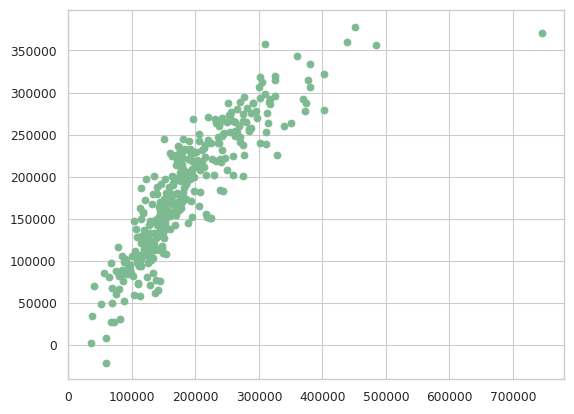

In [107]:
plt.scatter(y_val, y_predict)

In [108]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_predict)))

Mean Absolute Error: 26442.26839252299
Mean Squared Error: 1530807254.421168
Root Mean Squared Error: 39125.532001765394


In [109]:
metrics.explained_variance_score(y_val, y_predict)

0.7670810555159129

At this point, it is evident that this version performs less. We can conclude it since there is a higher RMSE and lower explained variance.

## Version 4

Let's try to remove 'TotRmsAbvGrd' again and return 'GrLivArea', but don’t add 'FullBath' feature since it is highly correlated to 'GrLivArea'.

In [110]:
X = train_data[['LotArea','OverallQual','GrLivArea','Fireplaces','WoodDeckSF','OpenPorchSF','YrFBuild', 'YrFRemod']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [111]:
lm.fit(X_train,y_train)

LinearRegression()

In [112]:
coefs = pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coefficient'])
coefs

,Coefficient
LotArea,0.689978
OverallQual,23837.795853
GrLivArea,48.589881
Fireplaces,10399.365459
WoodDeckSF,42.773243
OpenPorchSF,3.640347
YrFBuild,-386.593868
YrFRemod,-301.144115


In [113]:
y_predict = lm.predict(X_val)

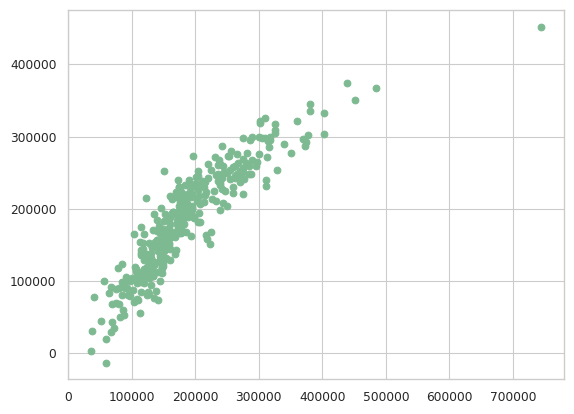

In [114]:
plt.scatter(y_val, y_predict)

In [115]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_predict)))

Mean Absolute Error: 24656.517371841688
Mean Squared Error: 1210102757.4325025
Root Mean Squared Error: 34786.53126473668


In [116]:
metrics.explained_variance_score(y_val, y_predict)

0.81555258984051

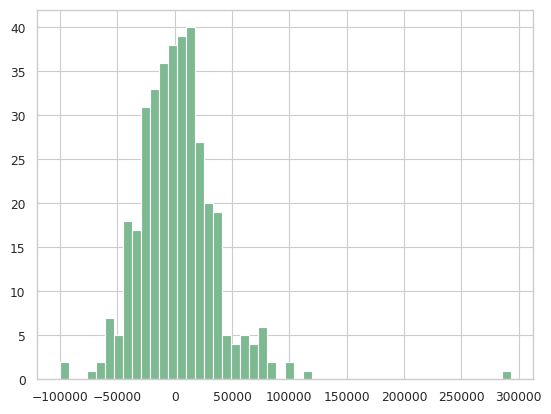

In [117]:
plt.hist((y_val-y_predict), bins=50)
plt.show()

In [118]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])
df_vif

,VIF
LotArea,2.374026
OverallQual,14.820715
GrLivArea,17.946507
Fireplaces,2.499343
WoodDeckSF,1.765327
OpenPorchSF,1.736336
YrFBuild,3.749704
YrFRemod,3.370102


## Version 5

In the previous version, there were still high variance inflation factors for GrLivArea and OverallQual. Let's try to use two features related to the size of property '1stFlrSF', '2ndFlrSF' instead of 'GrLivArea'. These two features have a lower correlation coefficient with 'OverallQual'.

In [119]:
X = train_data[['LotArea','OverallQual','1stFlrSF','2ndFlrSF','Fireplaces','WoodDeckSF','OpenPorchSF','YrFBuild', 'YrFRemod']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [120]:
lm.fit(X_train,y_train)

LinearRegression()

In [121]:
coefs = pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coefficient'])
coefs

,Coefficient
LotArea,0.557490
OverallQual,22893.485941
1stFlrSF,68.432155
2ndFlrSF,41.038823
Fireplaces,8373.080370
WoodDeckSF,38.154427
OpenPorchSF,4.754492
YrFBuild,-325.473342
YrFRemod,-333.520369


In [122]:
y_predict = lm.predict(X_val)

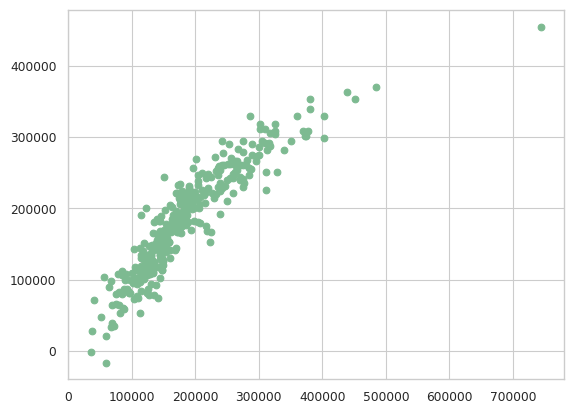

In [123]:
plt.scatter(y_val, y_predict)

In [124]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_predict)))

Mean Absolute Error: 22949.48801466307
Mean Squared Error: 1092192225.6685941
Root Mean Squared Error: 33048.33166240913


In [125]:
metrics.explained_variance_score(y_val, y_predict)

0.8336902441195502

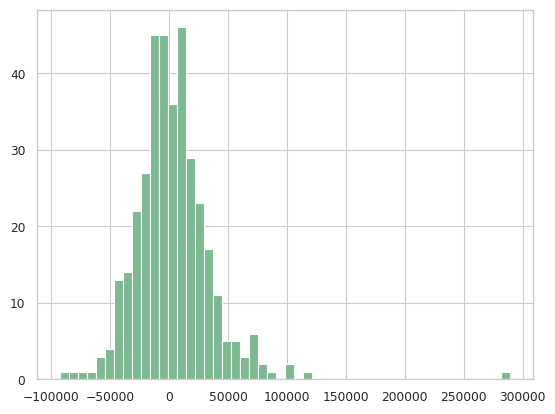

In [126]:
plt.hist((y_val-y_predict), bins=50)
plt.show()

In [127]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])
df_vif

,VIF
LotArea,2.463517
OverallQual,19.126516
1stFlrSF,19.296238
2ndFlrSF,2.477677
Fireplaces,2.524278
WoodDeckSF,1.772952
OpenPorchSF,1.735231
YrFBuild,3.720641
YrFRemod,3.417373
